# Improving a particular person's genome using SNPs data

## Data preparation

Working with Mikhails' genome data (https://drive.google.com/open?id=1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j)...

In [ ]:
# download and extract data

!wget "https://drive.google.com/uc?export=download&id=1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j"
!unzip "/content/uc?export=download&id=1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j"
!mv /content/SNP_raw_v4_Full_20170514175358.txt snps_raw.txt

--2022-02-28 15:48:50--  https://drive.google.com/uc?export=download&id=1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j
Resolving drive.google.com (drive.google.com)... 142.250.141.113, 142.250.141.139, 142.250.141.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ubfgg0te1nub40dja4hektlf7h5bh1er/1646063325000/07448589968955595602/*/1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j?e=download [following]
--2022-02-28 15:48:52--  https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ubfgg0te1nub40dja4hektlf7h5bh1er/1646063325000/07448589968955595602/*/1QJkwJe5Xl_jSVpqdTSNXP7sqlYfI666j?e=download
Resolving doc-08-b8-docs.googleusercontent.com (doc-08-b8-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-08-b8-docs.googleusercontent.com (doc-08-b8

In [ ]:
# take a look at file with SNP's

!head -n 25 snps_raw.txt

# This data file generated by 23andMe at: Sun May 14 17:53:58 2017
#
# This file contains raw genotype data, including data that is not used in 23andMe reports.
# This data has undergone a general quality review however only a subset of markers have been 
# individually validated for accuracy. As such, this data is suitable only for research, 
# educational, and informational use and not for medical or other use.
# 
# Below is a text version of your data.  Fields are TAB-separated
# Each line corresponds to a single SNP.  For each SNP, we provide its identifier 
# (an rsid or an internal id), its location on the reference human genome, and the 
# genotype call oriented with respect to the plus strand on the human reference sequence.
# We are using reference human assembly build 37 (also known as Annotation Release 104).
# Note that it is possible that data downloaded at different times may be different due to ongoing 
# improvements in our ability to call genotypes. More information ab

## Convert data to .vcf

We will remove all SNPs corresponding to deletions and insertions, to make the file compatible with annotation tools.


The resulting file contains all the analyzed SNPs, and we are interested only in variable positions.


In [ ]:
# donwload and extract PLINK tool

!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip
!unzip plink_linux_x86_64_20210606.zip -d plink1

--2022-02-28 15:49:42--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20210606.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.226.144
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.226.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8917076 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20210606.zip’

plink_linux_x86_64_ 100%[===================>]   8.50M  13.9MB/s    in 0.6s    

2022-02-28 15:49:43 (13.9 MB/s) - ‘plink_linux_x86_64_20210606.zip’ saved [8917076/8917076]

Archive:  plink_linux_x86_64_20210606.zip
  inflating: plink1/plink            
  inflating: plink1/LICENSE          
  inflating: plink1/toy.ped          
  inflating: plink1/toy.map          
  inflating: plink1/prettify         


In [ ]:
# --23file <fname> [FID] [IID] [sex] [pheno] [pat. ID] [mat. ID] :
#   Specify 23andMe input file.

# --recode <output format> [{01 | 12}] [{tab | tabx | spacex | bgz | gen-gz}]
#          ['include-alt'] ['omit-nonmale-y']
# Create a new text fileset with all filters applied.  The following output
# formats are supported:
# <...>
# * 'vcf', 'vcf-fid', 'vcf-iid': VCFv4.2.  'vcf-fid' and 'vcf-iid' cause
#   family IDs or within-family IDs respectively to be used for the sample
#   IDs in the last header row, while 'vcf' merges both IDs and puts an
#   underscore between them.  If the 'bgz' modifier is added, the VCF file is
#   block-gzipped.
#   The A2 allele is saved as the reference and normally flagged as not based
#   on a real reference genome (INFO:PR).  When it is important for reference
#   alleles to be correct, you'll also want to include --a2-allele and
#   --real-ref-alleles in your command.
# <...>

# --out <prefix>   : Specify prefix for output files.

# --output-chr <MT code> : Set chromosome coding scheme in output files by
#                          providing the desired human mitochondrial code.
#                          (Options are '26', 'M', 'MT', '0M', 'chr26', 'chrM',
#                          and 'chrMT'.)

# --snps-only ['just-acgt'] : Exclude non-SNP variants.  By default, SNP = both
#                             allele codes are single-character; 'just-acgt'
#                             restricts codes to {A,C,G,T,a,c,g,t,<missing>}.



!plink1/plink --23file snps_raw.txt \
              --recode vcf \
              --out snps_clean \
              --output-chr MT \
              --snps-only just-acgt

PLINK v1.90b6.24 64-bit (6 Jun 2021)           www.cog-genomics.org/plink/1.9/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to snps_clean.log.
Options in effect:
  --23file snps_raw.txt
  --out snps_clean
  --output-chr MT
  --recode vcf
  --snps-only just-acgt

12991 MB RAM detected; reserving 6495 MB for main workspace.
--23file: snps_clean-temporary.bed + snps_clean-temporary.bim +
snps_clean-temporary.fam written.
15125 variants with indel calls present.  '--snps-only no-DI' or
--list-23-indels may be useful here.
Inferred sex: male.
595401 out of 610526 variants loaded from .bim file.
1 person (1 male, 0 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1 founder and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%

In [ ]:
# take a look at .vcf file with SNPs

!cat snps_clean.vcf | grep -v '##' | head

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	FAM001_ID001
1	734462	rs12564807	A	.	.	.	PR	GT	0/0
1	752721	rs3131972	A	G	.	.	PR	GT	0/1
1	760998	rs148828841	C	.	.	.	PR	GT	0/0
1	776546	rs12124819	A	.	.	.	PR	GT	0/0
1	787173	rs115093905	N	.	.	.	PR	GT	./.
1	798959	rs11240777	A	G	.	.	PR	GT	0/1
1	824398	rs7538305	N	.	.	.	PR	GT	./.
1	838555	rs4970383	C	.	.	.	PR	GT	0/0
1	846808	rs4475691	C	.	.	.	PR	GT	0/0


## 2. Annotate.

Uploading *snps_clean.vcf* file on [VEP](http://grch37.ensembl.org/Homo_sapiens/Tools/VEP) site. <br>

Species: *Homo sapiens* <br>
Assembly: *GRCh37.p13* <br>
Transcript database to use: *Ensembl/GENCODE and RefSeq transcripts* <br>
All other setting by default

**Results:** (can be downloaded from my GDrive)


In [ ]:
!wget 'http://grch37.ensembl.org/Homo_sapiens/Download/Tools/VEP?format=txt;tl=F9WJ7X1i9BuEDpiS-8052633'
!mv "VEP?format=txt;tl=F9WJ7X1i9BuEDpiS-8052633" vep_output.txt

--2022-02-28 15:52:39--  http://grch37.ensembl.org/Homo_sapiens/Download/Tools/VEP?format=txt;tl=F9WJ7X1i9BuEDpiS-8052633
Resolving grch37.ensembl.org (grch37.ensembl.org)... 193.62.193.83
Connecting to grch37.ensembl.org (grch37.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘VEP?format=txt;tl=F9WJ7X1i9BuEDpiS-8052633’

VEP?format=txt;tl=F     [                 <=>] 220.02M  2.56MB/s    in 85s     

2022-02-28 15:54:06 (2.59 MB/s) - ‘VEP?format=txt;tl=F9WJ7X1i9BuEDpiS-8052633’ saved [230708584]



In [ ]:
# Take a look at col names

!cat vep_output.txt | cut -f1-60 | head -n 1

#Uploaded_variation	Location	Allele	Consequence	IMPACT	SYMBOL	Gene	Feature_type	Feature	BIOTYPE	EXON	INTRON	HGVSc	HGVSp	cDNA_position	CDS_position	Protein_position	Amino_acids	Codons	Existing_variation	DISTANCE	STRAND	FLAGS	SYMBOL_SOURCE	HGNC_ID	MANE_SELECT	MANE_PLUS_CLINICAL	TSL	APPRIS	REFSEQ_MATCH	SOURCE	REFSEQ_OFFSET	GIVEN_REF	USED_REF	BAM_EDIT	SIFT	PolyPhen	AF	CLIN_SIG	SOMATIC	PHENO	PUBMED	MOTIF_NAME	MOTIF_POS	HIGH_INF_POS	MOTIF_SCORE_CHANGE	TRANSCRIPTION_FACTORS


In [ ]:
# we are interested in CLIN_SIG	column

!cat vep_output.txt | cut -f39 | sort -u # grep risk_factor | cut -f 1-3 | sort | uniq 

-
affects
association
association,benign
association_not_found
benign
benign,affects
benign,association
benign,benign/likely_benign
benign,conflicting_interpretations_of_pathogenicity
benign,drug_response
benign,likely_benign
benign/likely_benign
benign,likely_benign,benign/likely_benign
benign/likely_benign,benign,likely_benign
benign,likely_benign,not_provided
benign,likely_benign,protective
benign,likely_benign,risk_factor
benign/likely_benign,uncertain_significance,benign,pathogenic,likely_benign
benign,likely_pathogenic
benign,not_provided
benign,other
benign,_other,not_provided,benign
benign,pathogenic
benign,risk_factor
benign,risk_factor,association
CLIN_SIG
drug_response
drug_response,benign
drug_response,benign,likely_benign
drug_response,benign,_other
drug_response,likely_benign
drug_response,risk_factor
likely_benign
likely_pathogenic
likely_pathogenic,benign
not_provided
not_provided,benign
not_provided,drug_response
not_provided,drug_response,benign
other
other,benign
pat

$~$

On the next few steps we checked different SNPs with dbSNP and SNPedia databases to make some fixes and improvements (see lab report).


In [ ]:
# lets check 

!cat vep_output.txt | cut -f1-3,39 | grep risk_factor | sort -u 

i3000469	2:138759649-138759649	T	risk_factor
i6007787	2:234183368-234183368	G	risk_factor,benign
i6058143	1:161479745-161479745	G	risk_factor,benign,drug_response
i6059141	8:133909974-133909974	G	risk_factor,benign
rs1024611	17:32579788-32579788	G	risk_factor,pathogenic
rs1049296	3:133494354-133494354	T	benign,risk_factor,association
rs10757274	9:22096055-22096055	G	risk_factor
rs1169288	12:121416650-121416650	C	risk_factor,benign
rs12150220	17:5485367-5485367	T	risk_factor
rs13266634	8:118184783-118184783	T	risk_factor
rs1801197	7:93055753-93055753	G	risk_factor
rs1801274	1:161479745-161479745	G	risk_factor,benign,drug_response
rs1801275	16:27374400-27374400	G	risk_factor
rs1801394	5:7870973-7870973	G	risk_factor,uncertain_significance,drug_response,benign
rs1801968	9:132580901-132580901	G	risk_factor,benign
rs2004640	7:128578301-128578301	T	pathogenic,risk_factor
rs2073658	1:161010762-161010762	T	risk_factor
rs2184026	9:101304348-101304348	T	risk_factor
rs2239704	6:31540141-31540141	

Based on our data investigation we suggest following corrections:

In [ ]:
# ~15-20% lower risk for hypertension or cardiovascular events 

!grep rs13333226 snps_raw.txt

rs13333226	16	20365654	AG


In [ ]:
#	greatly increased memory performance 

!grep rs17070145 snps_raw.txt


rs17070145	5	167845791	CT


In [ ]:
# -> (C;C) for "Good" Cholesterol

!grep rs3843763 snps_raw.txt

rs3843763	20	44548193	CT


In [ ]:
# reduce neccesary time sleep

# !grep rs1406844918 snps_raw.txt
!grep rs1406844918 vep_output.txt


# and also rs121912617
# This is classified as a sleep disorder, although it does not appear to have any known negative medical consequence. 

In [ ]:
# Individuals with one or especially two ADH2*2 alleles, are more likely to find drinking unpleasant and have a somewhat reduced risk for alcoholism.

!grep rs1229984 snps_raw.txt
# !grep rs1229984 vep_output.txt

rs1229984	4	100239319	CT


For more detailed information see lab report.

## Haplogroups based on mtDNA

1. With haplogrep: https://github.com/seppinho/haplogrep-cmd

In [ ]:
!curl -sL haplogrep.now.sh | bash

Installing Haplogrep v2.4.0...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   652  100   652    0     0   2388      0 --:--:-- --:--:-- --:--:--  2388
100 7554k  100 7554k    0     0  8846k      0 --:--:-- --:--:-- --:--:-- 8846k
Archive:  ./haplogrep.zip
  inflating: haplogrep.jar           
  inflating: haplogrep               

Haplogrep v2.4.0 installation completed. Have fun!



In [ ]:
# extract only mtDNA

!cat snps_clean.vcf  | grep '#' > snps_mt.vcf                  # header
!cat snps_clean.vcf | grep -v '##' | grep 'MT' >> snps_mt.vcf  # SNPs from mtDNA

In [ ]:
# make prediction

!./haplogrep classify --in snps_mt.vcf --format vcf --out haplogroups.txt


mtDNA Haplogroup Classifiction v2.4.0
https://github.com/seppinho/haplogrep-cmd
(c) Sebastian Schönherr, Hansi Weissensteiner, Lukas Forer, Dominic Pacher
sebastian.schoenherr@i-med.ac.at

[classify, --in, snps_mt.vcf, --format, vcf, --out, haplogroups.txt]
phylotree17_FU1.xml
Parameters:
Input format: vcf
Phylotree version: 17_FU1
Reference: rCRS
Extended report: false
Skip alignment rules: false
Used metric: kulczynski
Chip array data: false
Lineage: 0

Start Classification...
HaploGrep file written to /content/haplogroups.txt (Time: 1 sec)


In [ ]:
!cat haplogroups.txt

"SampleID"	"Haplogroup"	"Rank"	"Quality"	"Range"
"FAM001_ID001"	"H2a2a1"	"1"	"0.5000"	"1-16569"


Best prediction: **H2a2a1 haplogroup**

2. With https://dna.jameslick.com/mthap/ service.



**Result**: [google link](https://drive.google.com/file/d/1ZzHHOmLO3CXE1naKInR14pMC36v5j478/view?usp=sharing)

Best prediction: **H haplogroup**

$~$

## Y-chromosome haplogroup

The result of https://ytree.morleydna.com/processAutosomalExtract    
    
    63 Y-DNA position(s) lacking mutations recognised by the genetic genealogy community. These Y-DNA positions may not be very useful.
    166 recognised mutation(s) with positive calls.
    733 recognised mutation(s) with negative calls.
    1086 recognised mutation(s) with no-calls.

The most likely (Suggested subclade) is

Long name: R1a1a<br>

Short name(s): R1a-L168 (R1a-M17, R1a-M198)

$~$

Results from https://cladefinder.yseq.net




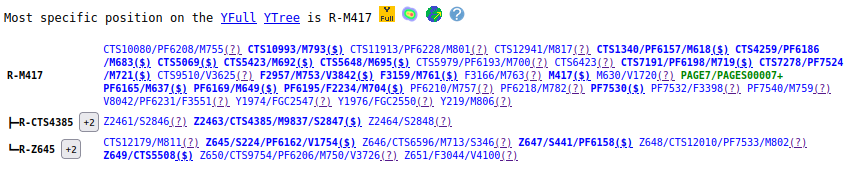


Most likely is R-M417 ([wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BF%D0%BB%D0%BE%D0%B3%D1%80%D1%83%D0%BF%D0%BF%D0%B0_R-M417)) <br>
┣━R-CTS4385 <br>
┗━R-Z645

Next best prediction (scored 68 compared to 69):

R-M198 <br>
┣━R-M417 <br>
┗━R-YP1051